In [3]:
import torch 
from torch.utils.data import Dataset, DataLoader
import os 
import numpy as np
from torchvision.transforms import Normalize

In [10]:
class WoFSCastDataset(Dataset):

    """
    Pytorch Dataset class for loading the WoFSCast predictions·
    and the associated WoFS target fields.·
    """
    # next = WoFS
    # cond = WoFSCast

    def __init__(self,
                 wofs_images,
                 wofscast_images,
                 diffs_stddev_path=None,
                 metadata=None):

        self.wofs_images = wofs_images
        self.wofscast_images = wofscast_images

        self.metadata = metadata

    def __len__(self):
        return len(self.wofs_images)

    def __getitem__(self, index):
        wofs_images = self.wofs_images[index]
        wofscast_images = self.wofscast_images[index]

        # Predicting the residual similar to CorrDiff
        # residual = wofs - wofscast
        # At sample time, wofscast + residual ~ wofs·
        residual = wofs_images - wofscast_images

        if self.metadata is not None:
            metadata = self.metadata[index]
            #return wofscast_images, wofs_images,  metadata
            return wofscast_images, wofs_images, residual, metadata
        else:
            return wofscast_images, wofs_images, residual
            #return wofscast_images, wofs_images

In [11]:
#I have an exisiting datafile here 
output_file = '/work/mflora/wofs-cast-data/predictions/wofscast_dataset_best_model_all_vars_norm_test.pt'

# Load the saved dataset from disk, this will take a min depending on the size 
dataset = torch.load(output_file)

torch_dataset = WoFSCastDataset(wofscast_images=dataset['conditional_images'],
                                wofs_images=dataset['next_image'], 
                               )
    
#throw it in a dataloader for fast CPU handoffs. 
#Note, you could add preprocessing steps with image permuations here i think 
train_dataloader = DataLoader(torch_dataset, batch_size=1, shuffle=True)

In [12]:
for step, (wofscast_image, wofs_image, residual) in enumerate(train_dataloader):
    break

In [14]:
wofscast_image.shape, wofs_image.shape, residual.shape

(torch.Size([1, 105, 160, 160]),
 torch.Size([1, 105, 160, 160]),
 torch.Size([1, 105, 160, 160]))

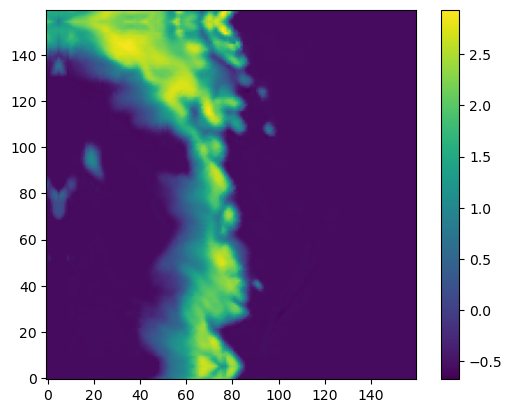

In [18]:
import matplotlib.pyplot as plt 

plt.imshow(wofscast_image.numpy()[0,0], origin='lower')
plt.colorbar()

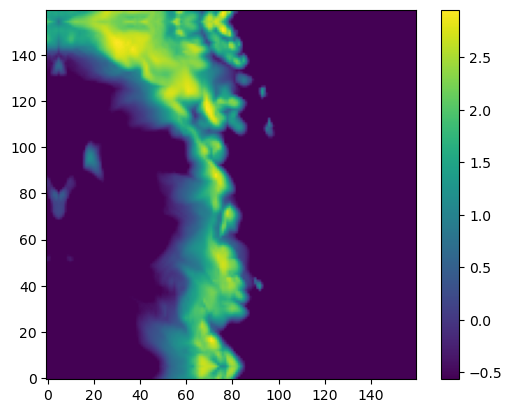

In [19]:
plt.imshow(wofs_image.numpy()[0,0], origin='lower')
plt.colorbar()

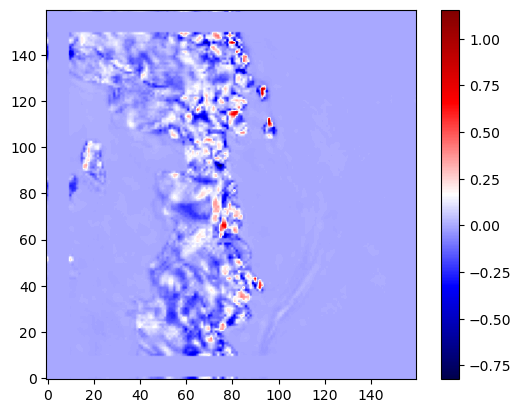

In [20]:
plt.imshow(residual.numpy()[0,0], cmap='seismic', origin='lower')
plt.colorbar()